In [1]:
# data => Salary_Data.csv
# location => https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.shape

(30, 2)

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

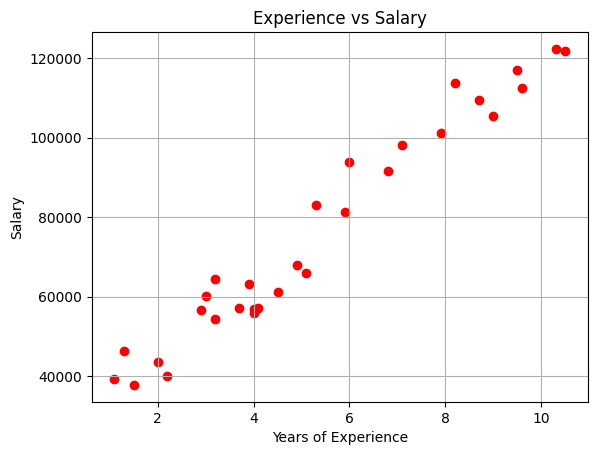

In [6]:
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(df['YearsExperience'], df['Salary'], color='red')
plt.grid()

In [7]:
# separating input and output columns.... 
# input -> 2d , output -> 1d

In [14]:
x = df[['YearsExperience']]  # 2d array
y = df['Salary']  # 1d array

In [15]:
x.ndim

2

In [16]:
y.ndim

1

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [21]:
# build the model

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [24]:
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [25]:
lr.coef_

array([9312.57512673])

In [26]:
lr.intercept_

np.float64(26780.09915062818)

In [27]:
# predict on test data and evaluate the model

In [28]:
y_pred = lr.predict(x_test)

In [29]:
# create a dataframe to compare actual vs predicted

In [30]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2446.1723690465055

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.988169515729126

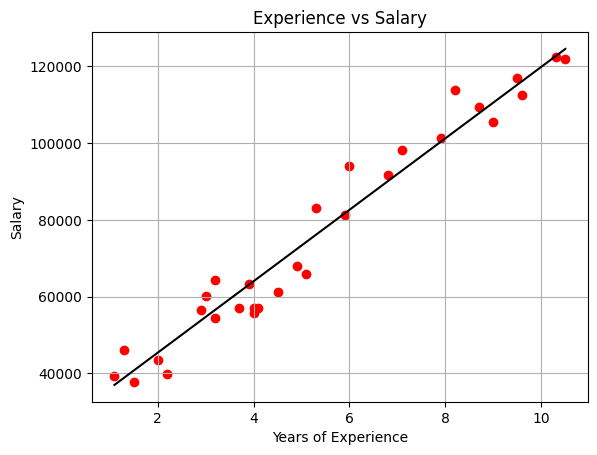

In [33]:
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(df['YearsExperience'], df['Salary'], color='red')
plt.plot(x, lr.predict(x), color = 'black')
plt.grid()

In [34]:
# Polynomial Regression

In [35]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [36]:
# polynomial features

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 13)

In [59]:
x_poly = poly.fit_transform(x)

In [60]:
x_poly

array([[1.00000000e+00, 1.10000000e+00, 1.21000000e+00, 1.33100000e+00,
        1.46410000e+00, 1.61051000e+00, 1.77156100e+00, 1.94871710e+00,
        2.14358881e+00, 2.35794769e+00, 2.59374246e+00, 2.85311671e+00,
        3.13842838e+00, 3.45227121e+00],
       [1.00000000e+00, 1.30000000e+00, 1.69000000e+00, 2.19700000e+00,
        2.85610000e+00, 3.71293000e+00, 4.82680900e+00, 6.27485170e+00,
        8.15730721e+00, 1.06044994e+01, 1.37858492e+01, 1.79216039e+01,
        2.32980851e+01, 3.02875107e+01],
       [1.00000000e+00, 1.50000000e+00, 2.25000000e+00, 3.37500000e+00,
        5.06250000e+00, 7.59375000e+00, 1.13906250e+01, 1.70859375e+01,
        2.56289062e+01, 3.84433594e+01, 5.76650391e+01, 8.64975586e+01,
        1.29746338e+02, 1.94619507e+02],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02,
        2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
        4.096

In [61]:
poly_reg = LinearRegression()

In [62]:
poly_reg.fit(x_poly, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
poly_reg.coef_

array([ 0.00000000e+00, -1.52950316e+04, -2.25046830e+04, -1.12942071e+04,
        1.34698497e+04,  1.53792443e+04, -1.97997747e+04,  9.27749947e+03,
       -2.42171875e+03,  3.91187376e+02, -4.01212733e+01,  2.55133244e+00,
       -9.19456987e-02,  1.43755824e-03])

In [64]:
poly_reg.intercept_

np.float64(80343.08573532104)

In [65]:
poly_reg.score(x_poly, y)

0.9801865417392446

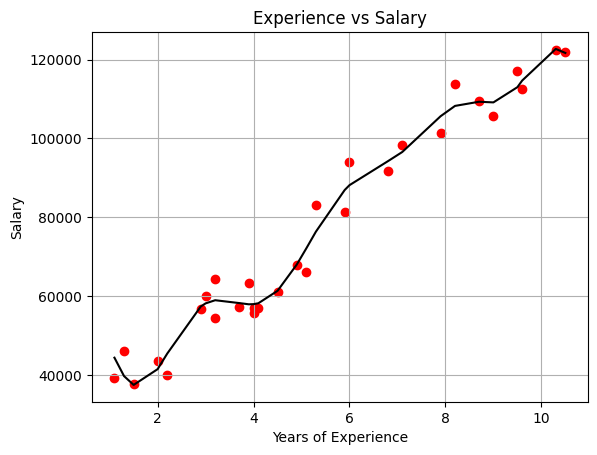

In [66]:
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(df['YearsExperience'], df['Salary'], color='red')
plt.plot(x, poly_reg.predict(x_poly), color = 'black')
plt.grid()